In [88]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [89]:
x=pd.read_csv('/content/drive/My Drive/Untitled folder/fake and true/Fake.csv')
x.shape
x.head()

x['check'] = 'FAKE'

In [90]:
y=pd.read_csv('/content/drive/My Drive/Untitled folder/fake and true/True.csv')
y.shape
y.head()
y['check'] = 'TRUE'

In [91]:
x.describe()

,title,text,subject,date,check
count,23481,23481,23481,23481,23481
unique,17903,17455,6,1681,1
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017",FAKE
freq,6,626,9050,46,23481


In [92]:
y.describe()

,title,text,subject,date,check
count,21417,21417,21417,21417,21417
unique,20826,21192,2,716,1
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017",TRUE
freq,14,8,11272,182,21417


In [93]:
df_news=pd.concat([x,y])

In [94]:
df_news.head(30)

,title,text,subject,date,check
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",FAKE
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",FAKE
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",FAKE
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",FAKE
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",FAKE
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",FAKE
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",FAKE
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",FAKE
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",FAKE
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",FAKE


In [95]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   check    44898 non-null  object
dtypes: object(5)
memory usage: 2.1+ MB


In [96]:
df_news.sample(frac=1)

,title,text,subject,date,check
21210,Nigeria asks Britain for gear to fight Islamis...,LAGOS (Reuters) - Britain is considering a req...,worldnews,"August 31, 2017",TRUE
20135,China's big money trumps U.S. influence in Cam...,(Story corrects to million from billion in pa...,worldnews,"September 11, 2017",TRUE
19039,LORETTA LYNCH Makes Disturbing VIDEO Encouragi...,Obama s former AG Loretta Lynch released a vid...,left-news,"Mar 4, 2017",FAKE
14761,BLACK LIVES MATTER TERRORISTS May Be Shut Down...,ter ror ist ter r st/ noun a person who uses ...,politics,"Dec 23, 2015",FAKE
5418,"Megyn Kelly Drops The Hammer On Roger Ailes, ...",The era of Roger Ailes at Fox News is definite...,News,"July 19, 2016",FAKE
...,...,...,...,...,...
5660,"Trump administration tightens Iran sanctions, ...",WASHINGTON (Reuters) - The Trump administratio...,politicsNews,"February 2, 2017",TRUE
3698,Trump Team Says Elton John Is Performing At I...,If Donald Trump thought he d be seeing Elton J...,News,"November 23, 2016",FAKE
1646,Democratic lawmakers seek probe of HHS secreta...,WASHINGTON (Reuters) - Several Democratic memb...,politicsNews,"September 20, 2017",TRUE
5826,Trump Posed With Pastor Who Said Gays Work Fo...,In the days following the massacre at the Puls...,News,"June 18, 2016",FAKE


In [97]:
df_news.isnull().sum()

title      0
text       0
subject    0
date       0
check      0
dtype: int64

In [98]:
df_news['article'] = df_news['title']+""+df_news['text']+""+['subject']
df = df_news[['article','check']]

In [99]:
#Converting to lower case

df['article'] = df['article'].apply(lambda x: x.lower())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [100]:
df['article'].head()

0     donald trump sends out embarrassing new year’...
1     drunk bragging trump staffer started russian ...
2     sheriff david clarke becomes an internet joke...
3     trump is so obsessed he even has obama’s name...
4     pope francis just called out donald trump dur...
Name: article, dtype: object

In [101]:
import string

def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

In [102]:
df['article'] = df['article'].apply(punctuation_removal)
df['article'].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0     donald trump sends out embarrassing new year’...
1     drunk bragging trump staffer started russian ...
2     sheriff david clarke becomes an internet joke...
3     trump is so obsessed he even has obama’s name...
4     pope francis just called out donald trump dur...
Name: article, dtype: object

In [103]:
!pip install nltk


In [104]:
df['article']

0         donald trump sends out embarrassing new year’...
1         drunk bragging trump staffer started russian ...
2         sheriff david clarke becomes an internet joke...
3         trump is so obsessed he even has obama’s name...
4         pope francis just called out donald trump dur...
                               ...                        
21412    fully committed nato backs new us approach on ...
21413    lexisnexis withdrew two products from chinese ...
21414    minsk cultural hub becomes haven from authorit...
21415    vatican upbeat on possibility of pope francis ...
21416    indonesia to buy 114 billion worth of russian ...
Name: article, Length: 44898, dtype: object

In [105]:
%matplotlib inline

from wordcloud import WordCloud

all_words = ' '.join([text for text in df.article])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

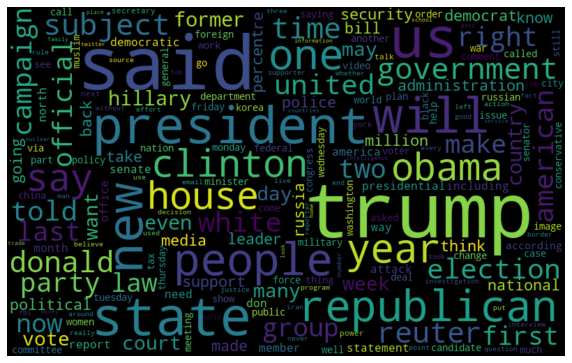

In [106]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [107]:
def wordcloud_true(text, column_text):
    true_text = text.query("[check ]== 'TRUE'")
    all_words = ' '.join([text for text in true_text[column_text]])

    wordcloud = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(all_words)
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [108]:
def wordcloud_fake(text, column_text):
    fake_text = text.query("[check] == 'FAKE'")
    all_words = ' '.join([text for text in fake_text[column_text]])

    wordcloud = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(all_words)
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [109]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

In [110]:
import seaborn as sns
import nltk
    
def pareto(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.show()

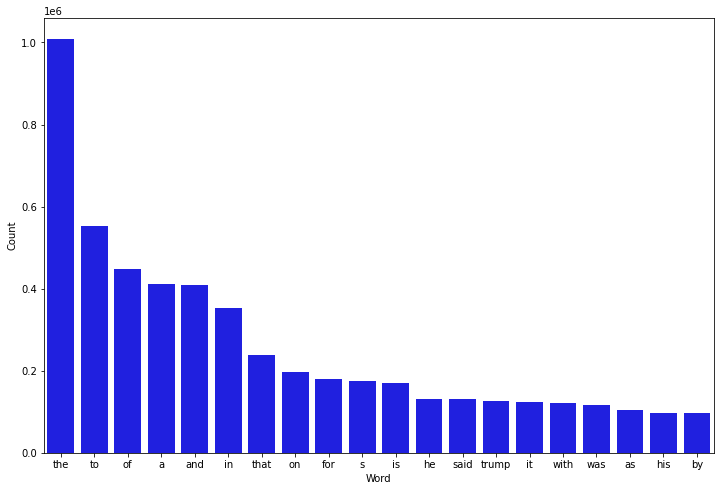

In [111]:
pareto(df, "article", 20)

In [112]:
'''from nltk.stem import WordNetLemmatizer 

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in df["article"]]

df['article'] = df["article"].apply(lemmatize_text)'''

'from nltk.stem import WordNetLemmatizer \n\nlemmatizer = WordNetLemmatizer()\n\ndef lemmatize_text(text):\n    return [lemmatizer.lemmatize(w) for w in df["article"]]\n\ndf[\'article\'] = df["article"].apply(lemmatize_text)'

In [113]:
from sklearn.feature_extraction.text import CountVectorizer

bow_article = CountVectorizer().fit(df['article'])

article_vect = bow_article.transform(df['article'])

In [114]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(article_vect)
news_tfidf = tfidf_transformer.transform(article_vect)
print(news_tfidf.shape)

(44898, 248247)


In [115]:
from sklearn.model_selection import train_test_split
X = news_tfidf
y = df['check']



X_train, X_test, Y_train,Y_test= train_test_split(X, y, test_size=0.2)

In [116]:
from sklearn.naive_bayes import MultinomialNB

fakenews_detector = MultinomialNB().fit(X_train, Y_train)

In [117]:
predictions = fakenews_detector.predict(X_test)
print(predictions)

['TRUE' 'TRUE' 'TRUE' ... 'TRUE' 'FAKE' 'TRUE']


In [118]:
from sklearn.metrics import classification_report
print (classification_report(Y_test, predictions))

              precision    recall  f1-score   support

        FAKE       0.94      0.95      0.94      4717
        TRUE       0.94      0.93      0.94      4263

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



In [119]:
from sklearn.linear_model import SGDClassifier

fake_detector_svc = SGDClassifier().fit(X_train, Y_train)

In [120]:
prediction_svc = fake_detector_svc.predict(X_test)

In [121]:
print (classification_report(Y_test, prediction_svc))

              precision    recall  f1-score   support

        FAKE       0.99      0.99      0.99      4717
        TRUE       0.99      0.99      0.99      4263

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [122]:
from sklearn.linear_model import LogisticRegression

fake_detector_logistic = LogisticRegression().fit(X_train, Y_train)

In [123]:
predictions_log_reg = fake_detector_logistic.predict(X_test)
print (classification_report(Y_test, predictions_log_reg))

              precision    recall  f1-score   support

        FAKE       0.99      0.99      0.99      4717
        TRUE       0.99      0.99      0.99      4263

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

